# Data Exploration

In [25]:
#import anaything we might need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#load in the data
observed_df = pd.read_csv( open ('train.csv' ) )
test_df = pd.read_csv( open ('test.csv' ) )

### Find target

In [27]:
#define target variable
target_var = pd.DataFrame( observed_df , columns = [ 'SalePrice' ] )

### Visualize target

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

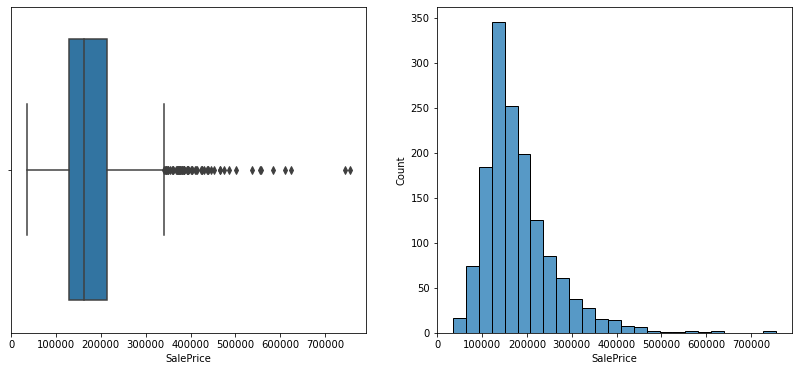

In [28]:
#size grid and plots
plt.figure( figsize = ( 14 , 6 ) )

plt.subplot( 1 , 2 , 1 )

#visualize target with box and whisker plot
sns.boxplot( x = observed_df.SalePrice )

plt.subplot( 1 , 2 , 2 )

#visualize target with distribution plot
sns.histplot( observed_df.SalePrice , bins = 25 )

Our target's distribution appears right skewed with more than a couple outliers

In [29]:
#print target statistics
observed_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [30]:
#find least expensive home
observed_df.SalePrice.min()

34900

In [31]:
#find most expensive home
observed_df.SalePrice.max()

755000

In [32]:
#find sale price of zero dollars
sum( observed_df.SalePrice == 0 )

0

SalePrice's in Training dataset range from 34900 to 755000 ( dollars ) without any zero dollar outliers

In [33]:
#find rows with SalePrice outliers
observed_df.loc[ observed_df.SalePrice > 600000 ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Using 600,000 dollars as the threshold for outliers because our visualization shows a "goal post" indicating anything above 600K can skew our plot by about 1/4; and potentially our model

### Findings

- 19 features with missing values
- Four rows with high impact towards machine learning model
- 25% of SalePrice's are above 214,000 dollars
- The mean SalePrice is just under 190,000 dollars

even if we dropped features with missing values, SalePrice will still be compared against about 30 numerical and 30 categorical variables

In [34]:
#create function plotting each categorical feature against target
def make_catplots( dataframe , target ):
    
    #loop through features
    for feature in dataframe:
        
        #visualize relationship between feature and target
        sns.catplot( x = feature , y = target , data = dataframe )

In [58]:
#create function plotting numerical features against target
def make_scatter( dataframe , target ):
    
    #loop through features
    for feature in dataframe:
        
        sns.relplot( x = feature , y = target , data = dataframe , kind = "line")

using a categorical scatterplot visualizes relationships between our target and other qualitative features

In [50]:
#create df with only categorical features
categ_df = observed_df[ observed_df.select_dtypes( include = [ "object" ] ).columns.to_numpy() ]

#create df with target variable
target_df = observed_df.SalePrice

#join categorical features and target salary on index
qual_df = pd.merge( categ_df , target_df , left_index = True , right_index = True )

/Users/sky/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


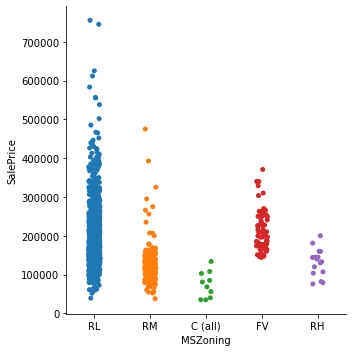

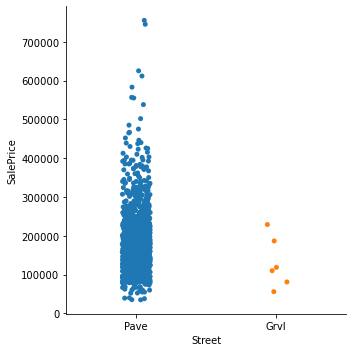

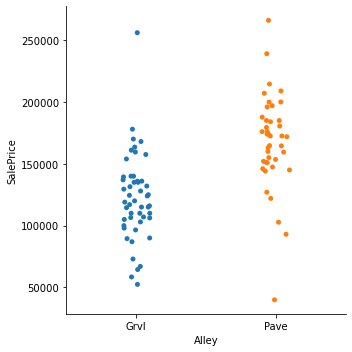

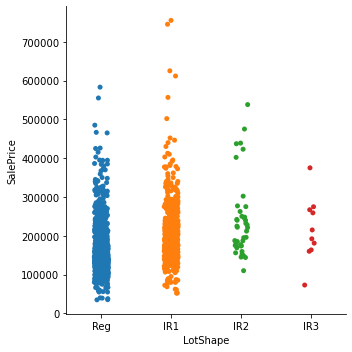

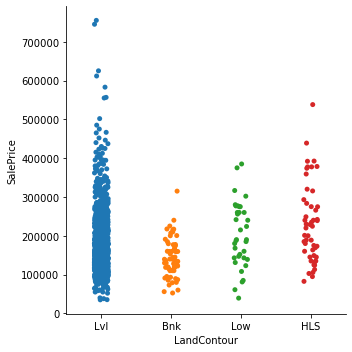

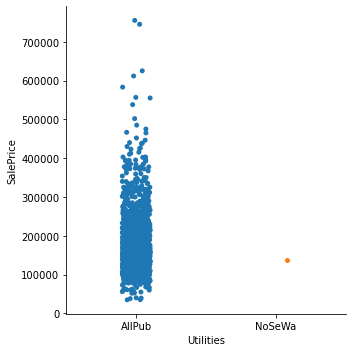

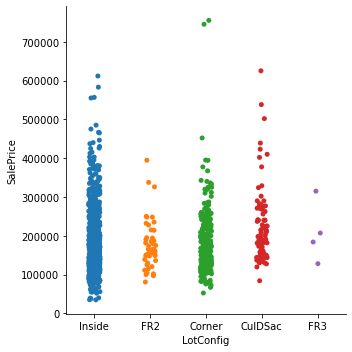

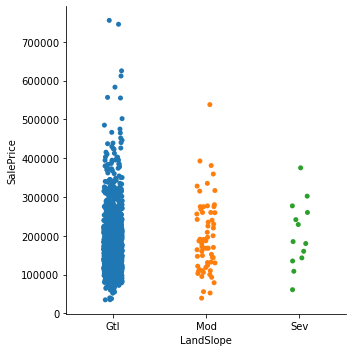

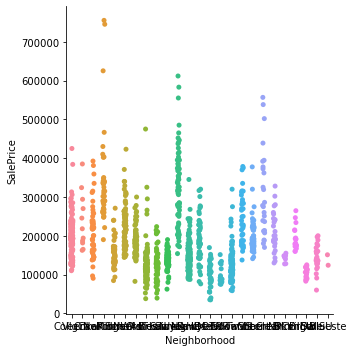

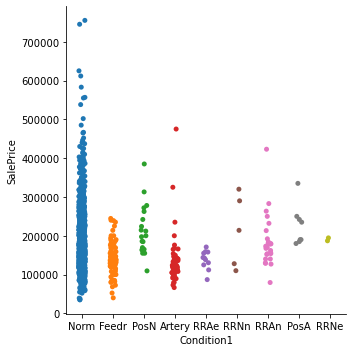

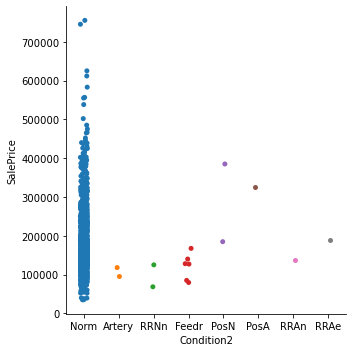

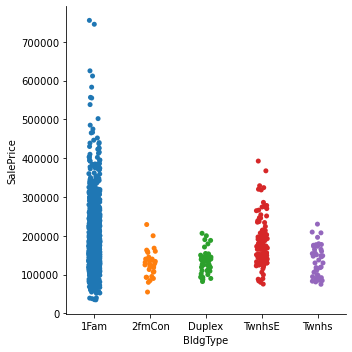

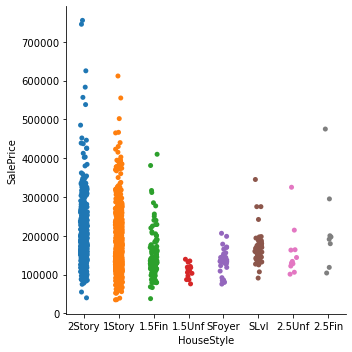

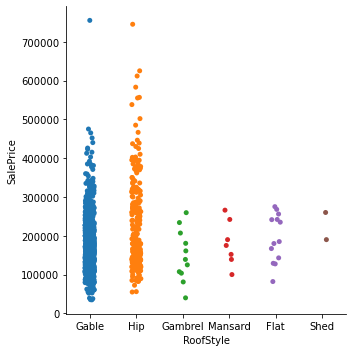

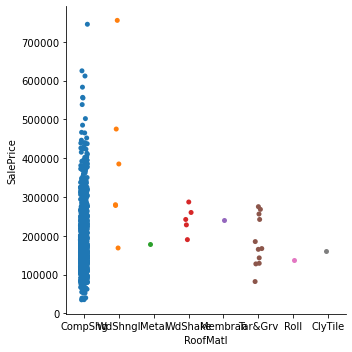

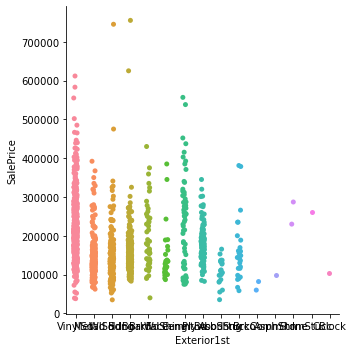

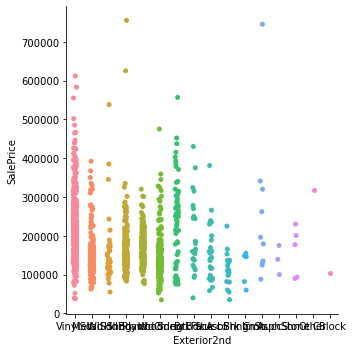

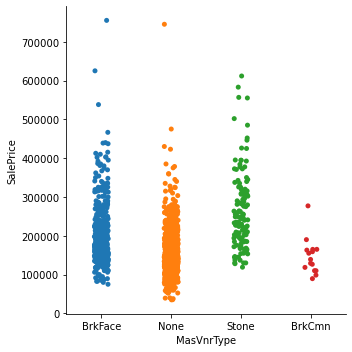

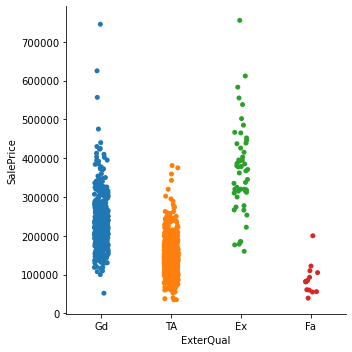

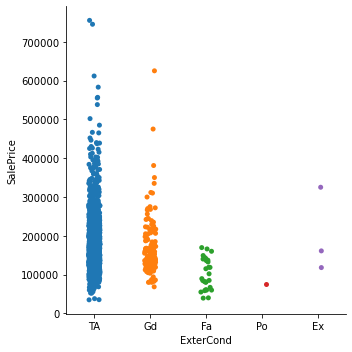

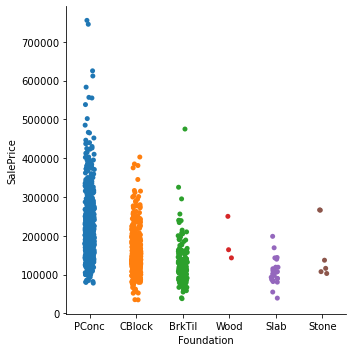

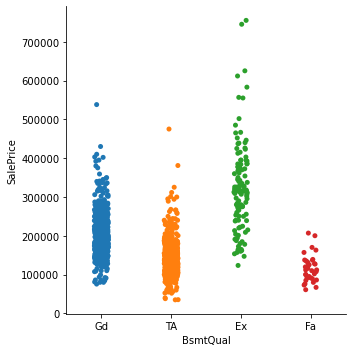

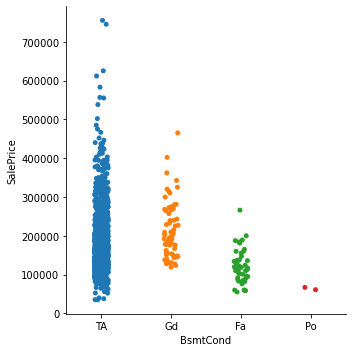

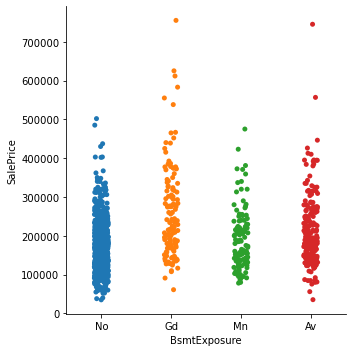

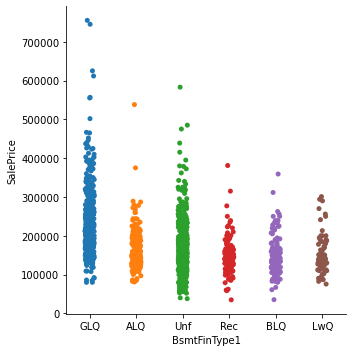

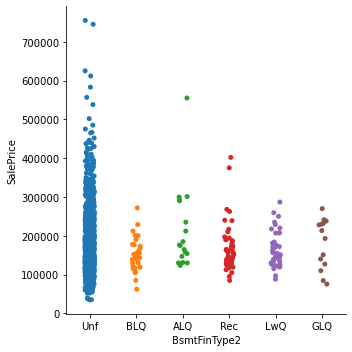

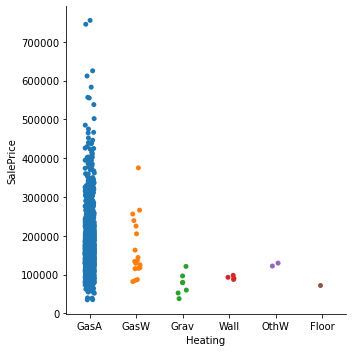

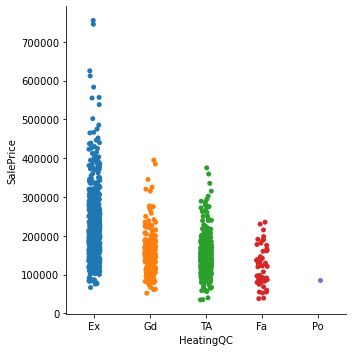

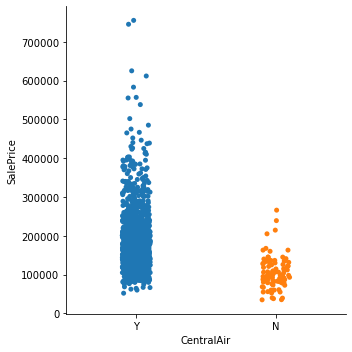

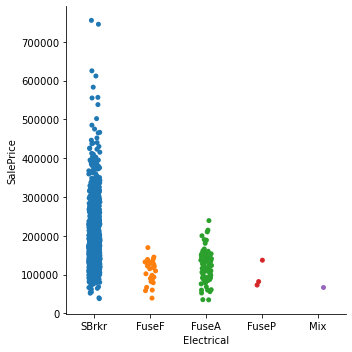

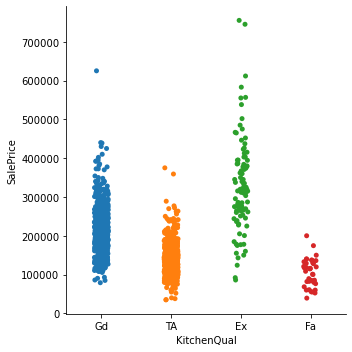

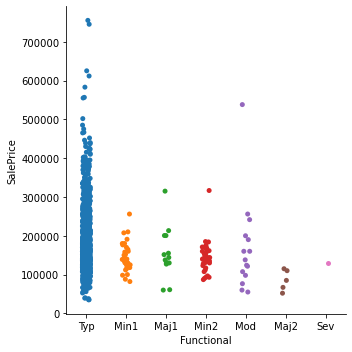

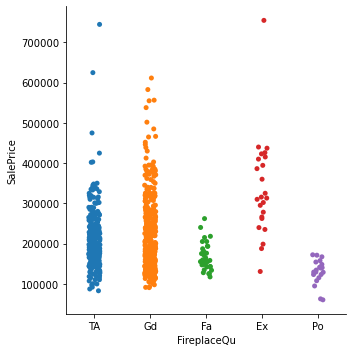

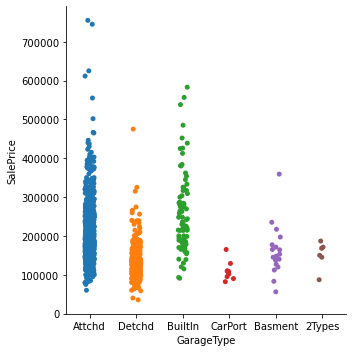

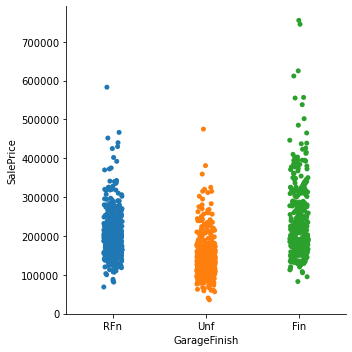

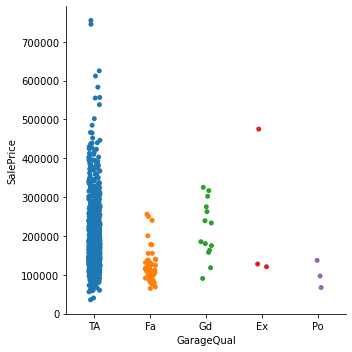

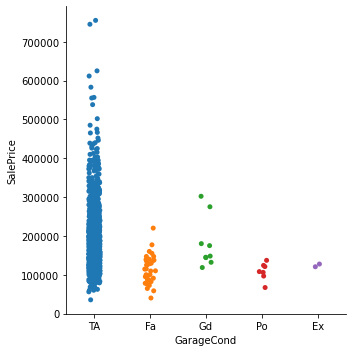

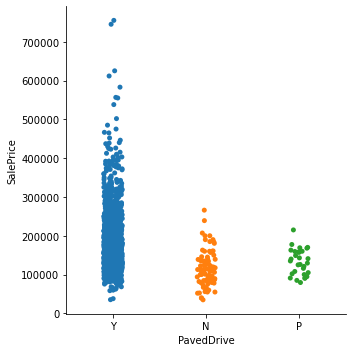

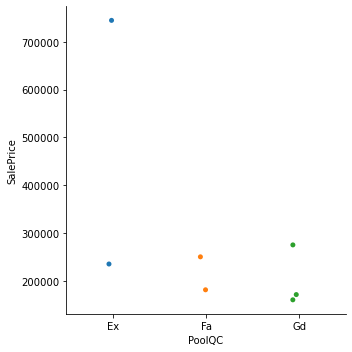

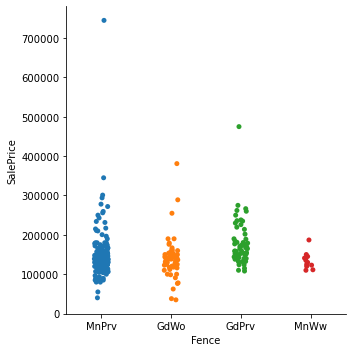

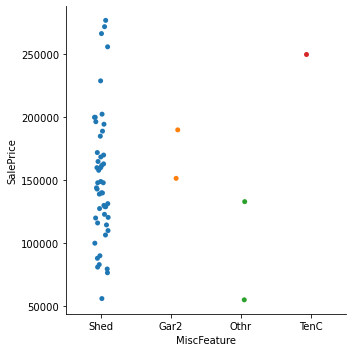

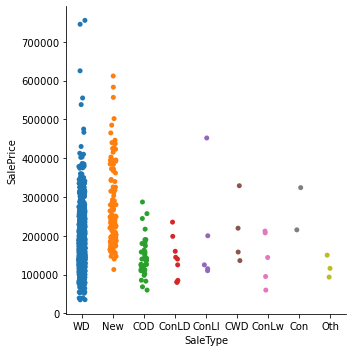

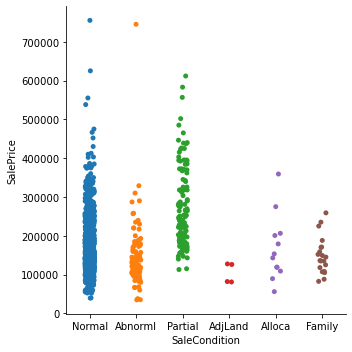

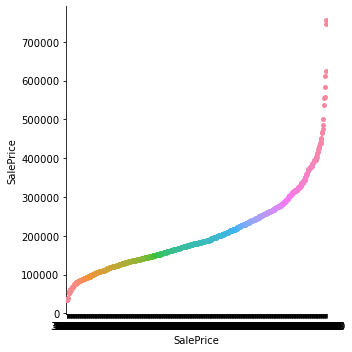

In [51]:
#visualize categorical features
make_catplots( qual_df , "SalePrice" )

plotting numerical features with a 95% confidence interval, we can see where the mean of a data point might fall

In [56]:
#create dataframe with only numerical datatypes
quant_df = observed_df[ observed_df.select_dtypes( include = [ "int64" , "float64" ] ).columns.to_numpy() ]

/Users/sky/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


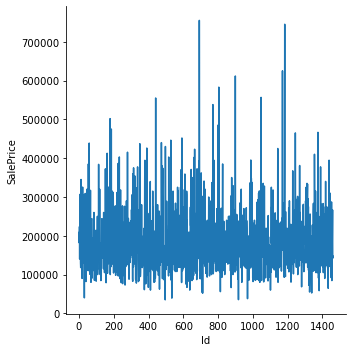

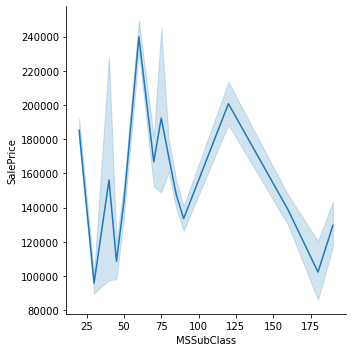

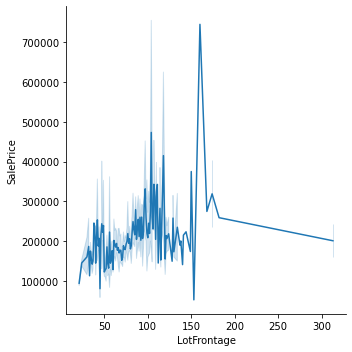

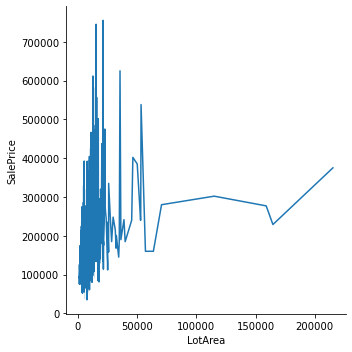

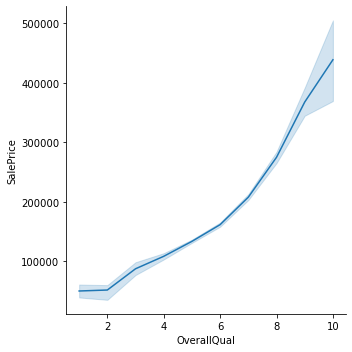

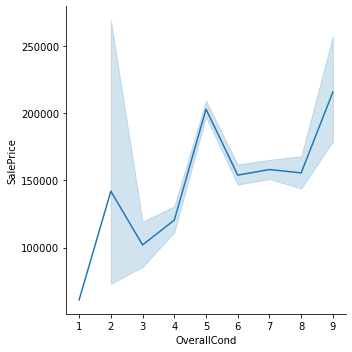

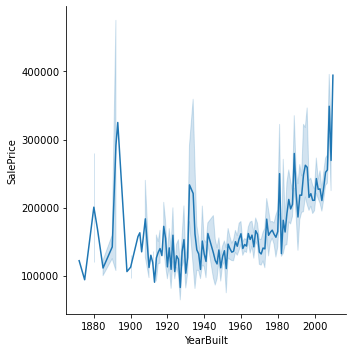

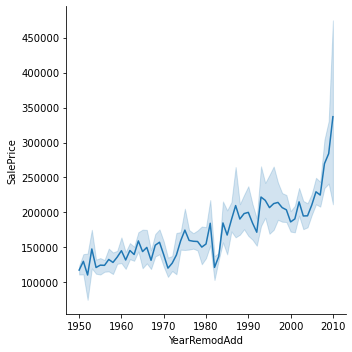

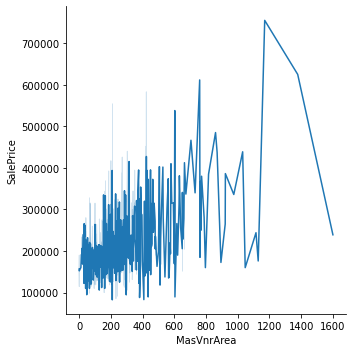

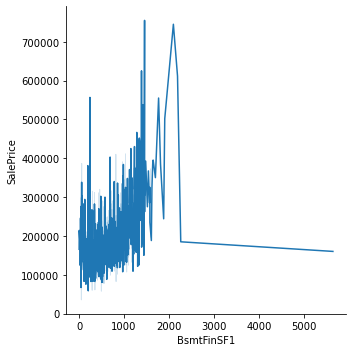

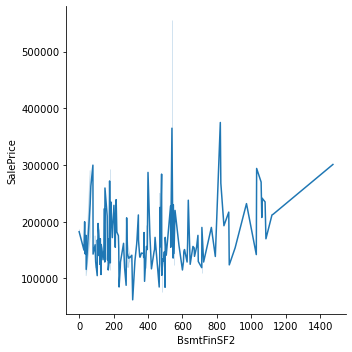

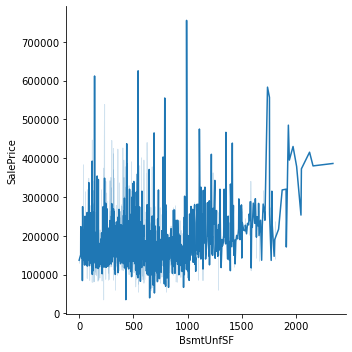

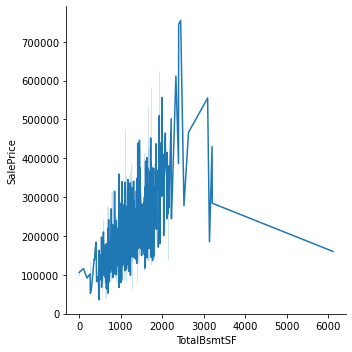

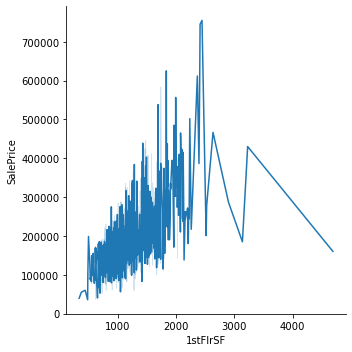

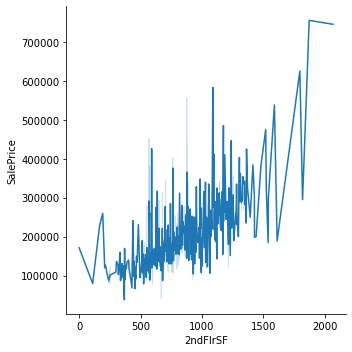

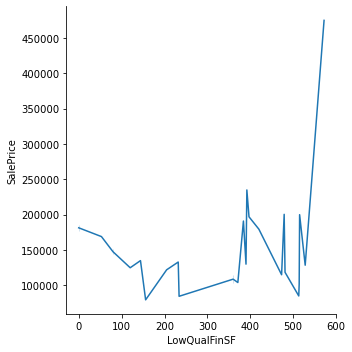

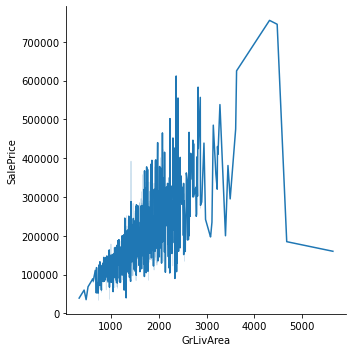

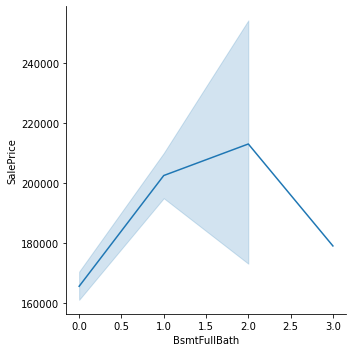

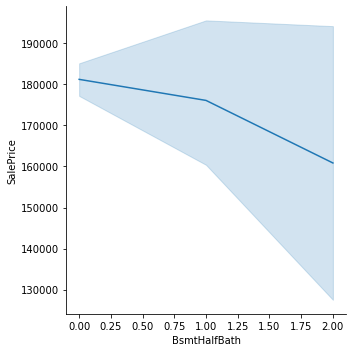

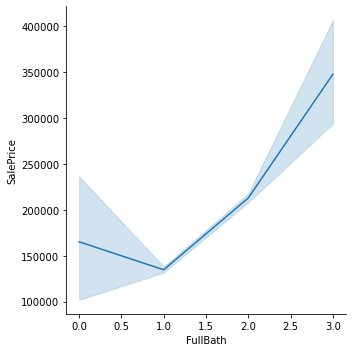

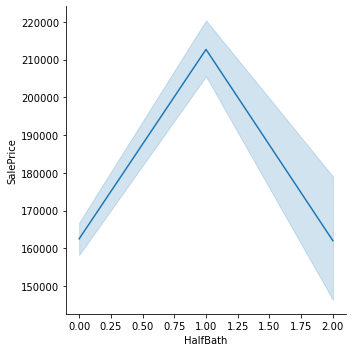

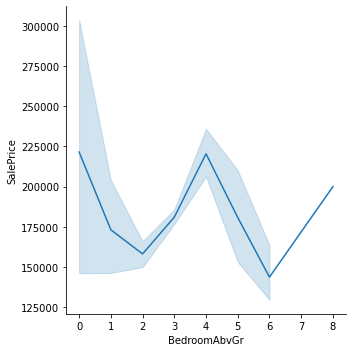

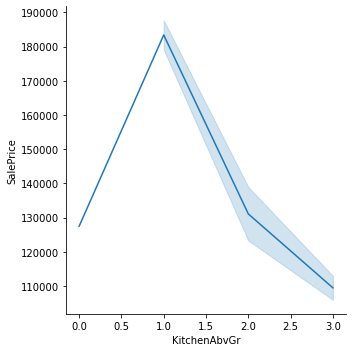

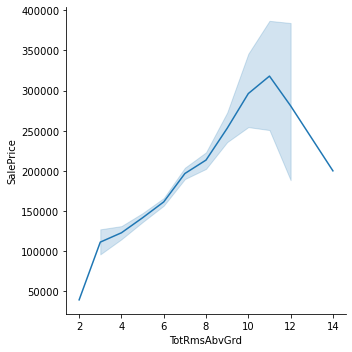

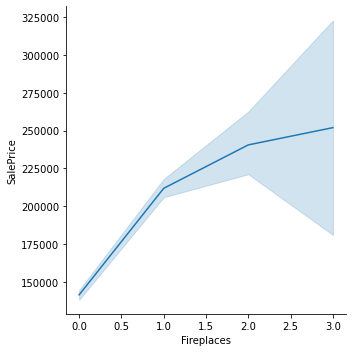

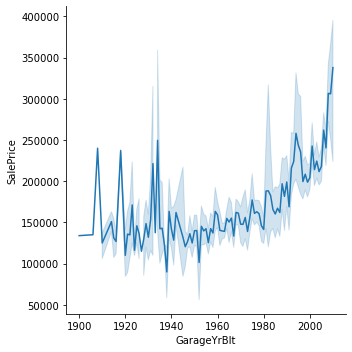

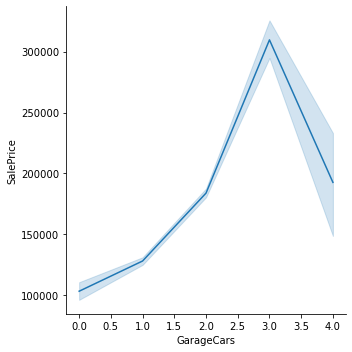

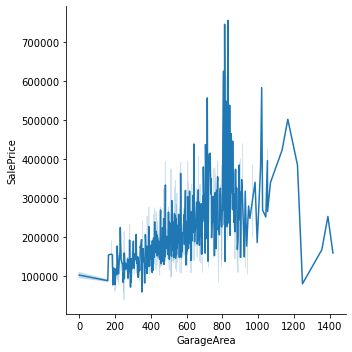

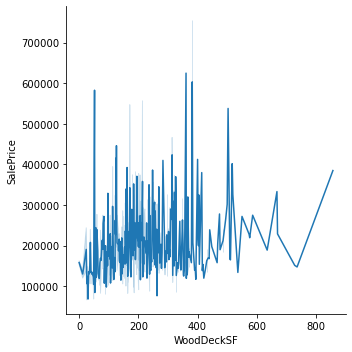

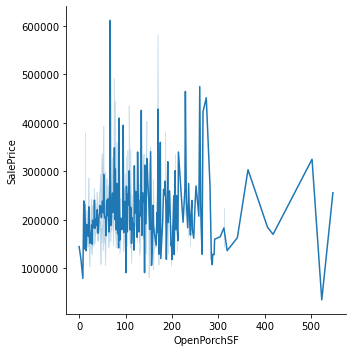

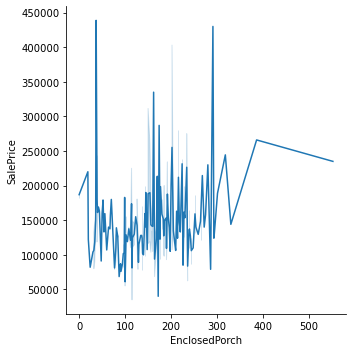

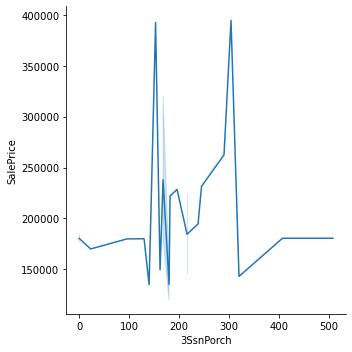

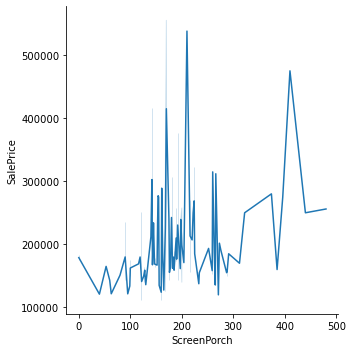

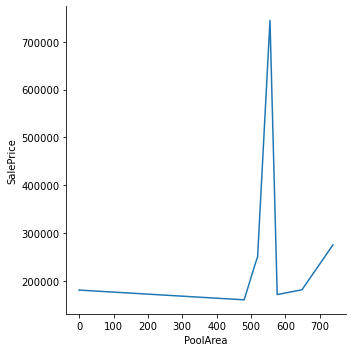

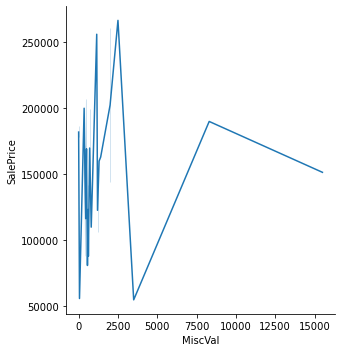

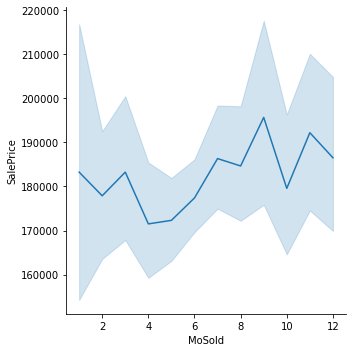

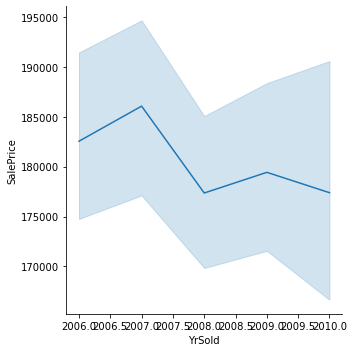

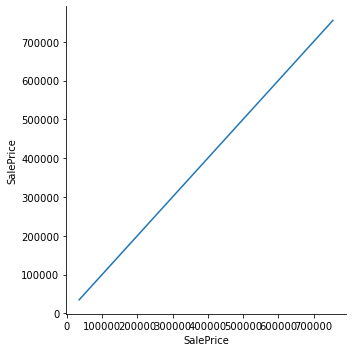

In [59]:
#visualize numerical features
make_scatter( quant_df , "SalePrice" )

## Data Mining Discoveries

### Categorical features

- majority of homes do not have pools
- heating quality varies widely regardless of most homes sharing Gas heating
- few homes reside on gravel streets

### Numerical features

- a positive relationship exists between overall quality and sale price
- a positive correlation exists between remodel data and sale price
- a garage holding 2.5 to 3.5 cards likely indicates a home in the 75th percentile 
- month and year sold has no correlation to a home's sale price